In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("salaries.csv")

df.head()

,years_of_experience,salary
0,5,3150
1,9,3787
2,4,2991
3,10,4551
4,8,3540


In [39]:
def drop_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

In [51]:
df = df.dropna()

df = drop_outliers(df, 'salary')
df = drop_outliers(df, 'years_of_experience')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   years_of_experience  100 non-null    int64
 1   salary               100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


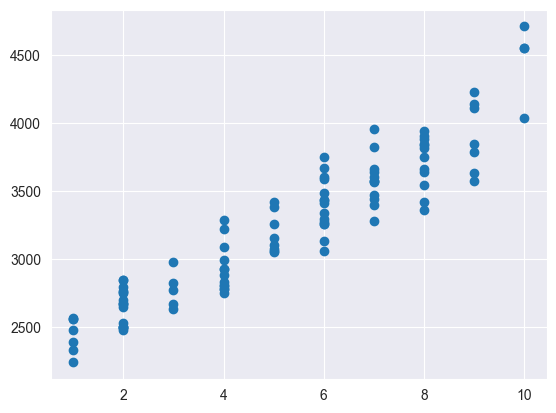

In [41]:
x = df.iloc[:, :-1].values  # get all rows with all columns except the last on
y = df.iloc[:, -1].values  # get all rows with only the last column

plt.scatter(x, y)

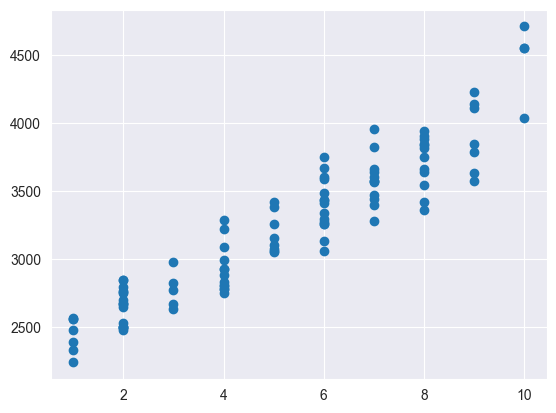

In [42]:
plt.scatter(x, y)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

In [44]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

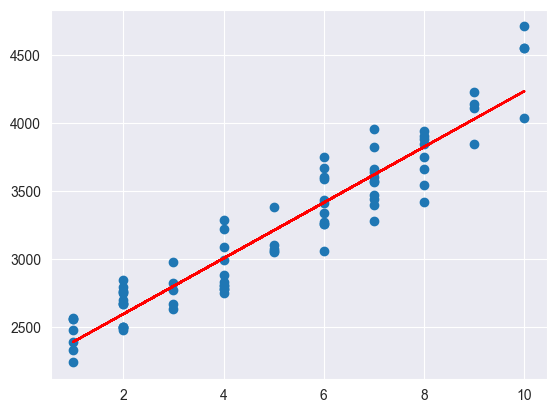

In [45]:
y_train_pred = linear_model.predict(x_train)

plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, color='red')

In [46]:
def percent_of(value):
    print(f"({round(value, 4) * 100}%)")

In [47]:
percent_of(linear_model.score(x_train, y_train))  # b0 + b1 * x

(89.75%)


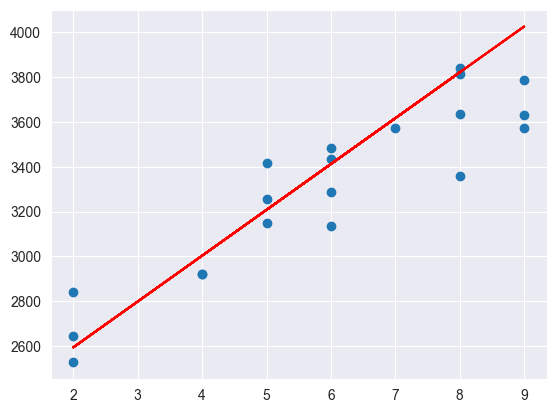

In [48]:
# Test data

y_test_pred = linear_model.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, color='red')

In [49]:
percent_of(linear_model.score(x_test, y_test))

(67.94%)
